# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [ ]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [7]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [18]:
from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=1)


In [56]:
from collections import deque
import torch

def dqn(n_episodes=5, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, checkpointFileName=None):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        checkpointFileName: name of file DQN model weights
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    score_max = 0
    eps = eps_start                    # initialize epsilon
    # Load network parameters
    if checkpointFileName is not None:
        agent.qnetwork_local.load_state_dict(torch.load(checkpointFileName))
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        score_mean = np.mean(scores_window)
        if score_mean>=10 and score_mean>(score_max+0.2):
            score_max = score_mean
            print('\nSave  at episode {:d}!\tAverage Score: {:.2f}'.format(i_episode, score_mean))
            checkpointFileName = 'checkpoint_Score_{:.2f}.pth'.format(score_mean)
            torch.save(agent.qnetwork_local.state_dict(), checkpointFileName)
            
    return scores, checkpointFileName

Episode 100	Average Score: 1.89
Episode 200	Average Score: 6.76
Episode 300	Average Score: 9.06
Episode 326	Average Score: 10.02
Save  at episode 326!	Average Score: 10.02
Episode 333	Average Score: 10.24
Save  at episode 333!	Average Score: 10.24
Episode 341	Average Score: 10.47
Save  at episode 341!	Average Score: 10.47
Episode 345	Average Score: 10.71
Save  at episode 345!	Average Score: 10.71
Episode 352	Average Score: 10.94
Save  at episode 352!	Average Score: 10.94
Episode 382	Average Score: 11.16
Save  at episode 382!	Average Score: 11.16
Episode 388	Average Score: 11.37
Save  at episode 388!	Average Score: 11.37
Episode 395	Average Score: 11.57
Save  at episode 395!	Average Score: 11.57
Episode 400	Average Score: 11.55
Episode 410	Average Score: 11.82
Save  at episode 410!	Average Score: 11.82
Episode 434	Average Score: 12.08
Save  at episode 434!	Average Score: 12.08
Episode 444	Average Score: 12.34
Save  at episode 444!	Average Score: 12.34
Episode 453	Average Score: 12.55
Sa

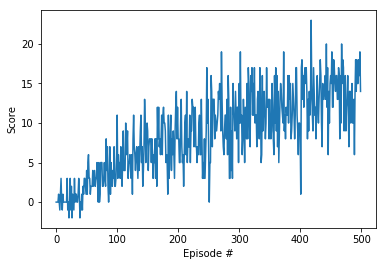

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

# Insert check point file name if train should continue from checkpoint
#checkpointFileName = None

# Run training 
scores, checkpointFileName = dqn(n_episodes=500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, checkpointFileName=checkpointFileName)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [55]:
# Load agent and test agent
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load(checkpointFileName))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state, 0)                 # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 16.0


In [37]:
type(checkpointFileName)


NoneType

In [44]:
f = 'sss'
def testfunc():
    f = 'f123'
    print(f)
   

print(f)
testfunc()
print(f)

sss
f123
sss
